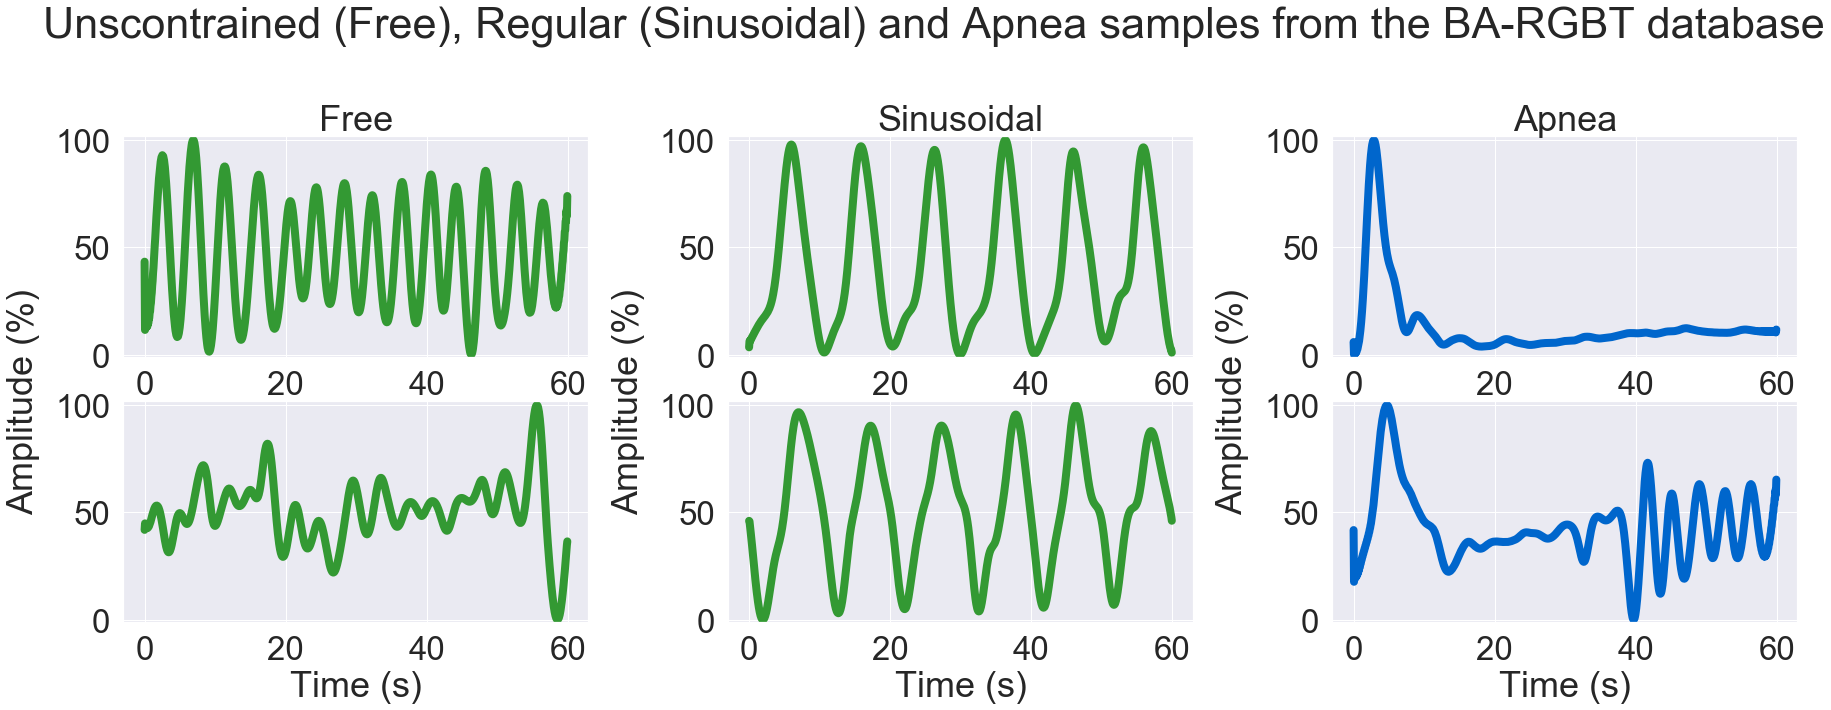

In [5]:

import matplotlib.pyplot as plt
import pickle
import numpy as np

user_labs = pickle.load(open('user_labs', 'rb'))
user_data = pickle.load(open('user_data', 'rb'))


import seaborn as sn

labs = ['Free', 'Sinusoidal', 'Apnea']

def normal(sg, minsg, maxsg):
    res = 100 * (sg - minsg) / (maxsg - minsg)
    return res


sn.set(font_scale=3)
def plot_rgbt_data():
    norm_free = normal(user_data[12][2], np.min(user_data[12][2]), np.max(user_data[12][2]))
    norm_sinus = normal(user_data[12][6], np.min(user_data[12][6]), np.max(user_data[12][6]))
    norm_apnea = normal(user_data[12][11], np.min(user_data[12][11]), np.max(user_data[12][11]))
    norm_free1 = normal(user_data[15][2], np.min(user_data[15][2]), np.max(user_data[15][2]))
    norm_sinus1 = normal(user_data[15][6], np.min(user_data[15][6]), np.max(user_data[15][6]))
    norm_apnea1 = normal(user_data[15][11], np.min(user_data[15][11]), np.max(user_data[15][11]))

    clr = ['#0066cc', '#66ccff','#339933']
    fig = plt.figure(figsize=(30,10))
    fig.tight_layout()
    fig.suptitle('Unscontrained (Free), Regular (Sinusoidal) and Apnea samples from the BA-RGBT database')

    plt.subplot(2,3,1)
    plt.title(labs[0])
    plt.plot(np.arange(0,60,0.06),norm_free, linewidth=8,color=clr[2])
    plt.ylim(-1,102)
    #plt.xlabel('Time (s)')
    plt.subplot(2,3,2)
    plt.title(labs[1])
    plt.plot(np.arange(0,60,0.06),norm_sinus, linewidth=8,color=clr[2])
    plt.ylim(-1,102)
    #plt.xlabel('Time (s)')
    plt.subplot(2,3,3)
    plt.title(labs[2])
    plt.plot(np.arange(0,60,0.06),norm_apnea, linewidth=8,color=clr[0])

    plt.ylim(-1,102)
    #plt.xlabel('Time (s)')
    ax = plt.subplot(2,3,4)
    plt.plot(np.arange(0,60,0.06),norm_free1, linewidth=8,color=clr[2])
    plt.ylim(-1,102)
    ax.yaxis.set_label_coords(-0.25, 1)
    plt.ylabel('Amplitude (%)', va='top')
    plt.xlabel('Time (s)')
    ax = plt.subplot(2,3,5)
    plt.plot(np.arange(0,60,0.06),norm_sinus1, linewidth=8,color=clr[2])
    plt.ylim(-1,102)
    plt.xlabel('Time (s)')

    ax.yaxis.set_label_coords(-0.25, 1)
    plt.ylabel('Amplitude (%)', va='top')
    ax = plt.subplot(2,3,6)
    plt.plot(np.arange(0,60,0.06),norm_apnea1, linewidth=8,color=clr[0])
    plt.ylim(-1,102)
    plt.xlabel('Time (s)')

    ax.yaxis.set_label_coords(-0.25, 1)
    plt.ylabel('Amplitude (%)', va='top')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.3, hspace=None)
    

    plt.savefig('signal_apnea.png', bbox_inches='tight', format='png')
    plt.show()

plot_rgbt_data()

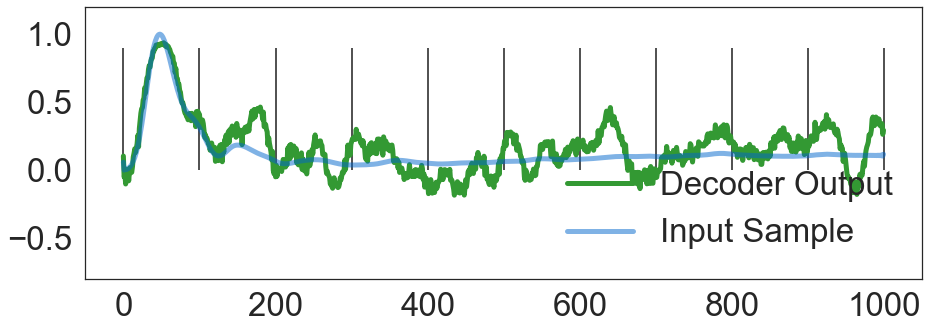

In [141]:
from sklearn.preprocessing import minmax_scale
sb.set_style("white")

clr = ['#0066cc', '#66ccff','#339933']
ae_decoder = pickle.load(open('RGBT_free_decoder','rb'))
ae_encoder = pickle.load(open('RGBT_free_encoder','rb'))
norm_free = minmax_scale(user_data[12][2])

    #norm_apnea = normal(user_data[12][11], np.min(user_data[12][11]), np.max(user_data[12][11]))
norm_free = minmax_scale(user_data[12][11])
dec = ae_encoder.predict(np.array([norm_free]))
dec_free = ae_decoder.predict(dec)[0]
plt.figure(figsize=(15,5))
plt.plot(dec_free, linewidth=5,color=clr[2], label = 'Decoder Output')
plt.plot(norm_free, linewidth=5,color=clr[0], label = 'Input Sample', alpha=0.5)

plt.ylim(-0.8, 1.2)
plt.legend(loc='lower right')
corr_size=10
plt.vlines(np.arange(0, 1000+1, 1000//corr_size), 0, 0.9)
plt.savefig('breathe_lines.png', format='png')

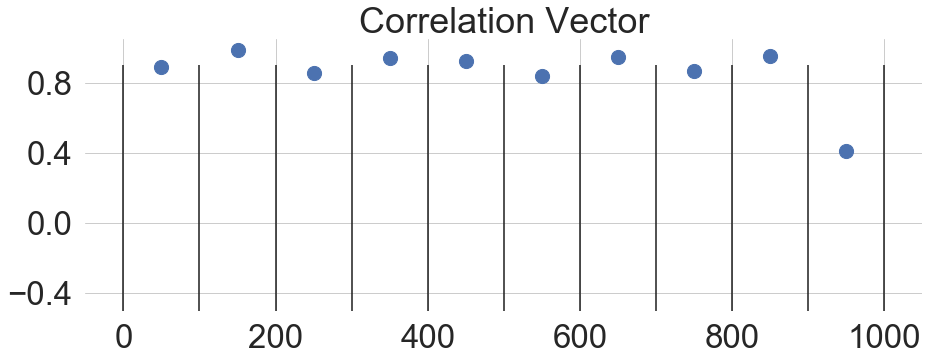

In [140]:
from sklearn.preprocessing import minmax_scale
sb.set_style("whitegrid")

clr = ['#0066cc', '#66ccff','#339933']
ae_decoder = pickle.load(open('RGBT_free_decoder','rb'))
ae_encoder = pickle.load(open('RGBT_free_encoder','rb'))
norm_free = minmax_scale(user_data[12][2])

norm_free = minmax_scale(user_data[12][2])
dec = ae_encoder.predict(np.array([norm_free]))
dec_free = ae_decoder.predict(dec)[0]
plt.figure(figsize=(15,5))
#plt.plot(norm_free, linewidth=5,color=clr[0], label = 'Input Sample', alpha=0.5)

#plt.plot(dec_free, linewidth=5,color=clr[2], label = 'Decoder Output')
plt.ylim(-0.5, 1.05)

plt.vlines(np.arange(0, 1000+1, 1000//corr_size), -0.5, 0.9)
corr_size=10
#plt.axis('off')
plt.gca().set_frame_on(False)
#plt.gca().set_axis_off()
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
 #           hspace = 0, wspace = 0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.yticks(np.arange(-0.4,1,0.4))
from scipy.stats import pearsonr

pearson_corr = [pearsonr(dec_free[i: i+1000//corr_size], norm_free[i:i+1000//corr_size])[0] for i in range(0, 1000, 1000//corr_size)]
plt.scatter(np.arange((1000//corr_size)//2,1000+(1000//corr_size)//2, 1000//corr_size),pearson_corr, s=200, label= 'Correlation Vector')


plt.title('Correlation Vector')
plt.savefig('breathe_corr.png', format='png', pad_inches=0)

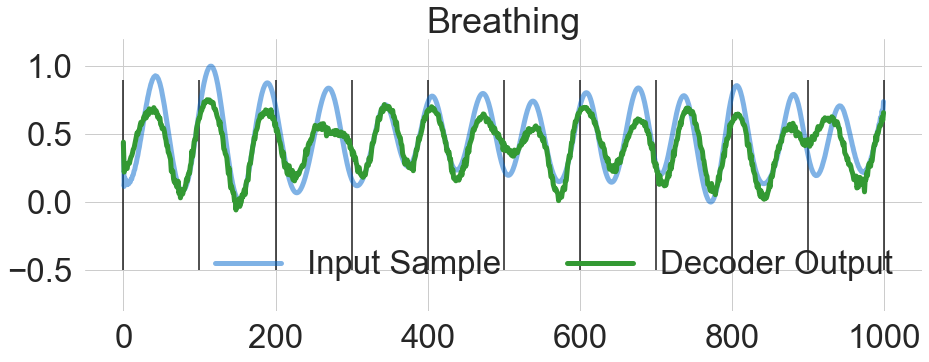

In [150]:
from sklearn.preprocessing import minmax_scale
sb.set_style("whitegrid")

clr = ['#0066cc', '#66ccff','#339933']
ae_decoder = pickle.load(open('RGBT_free_decoder','rb'))
ae_encoder = pickle.load(open('RGBT_free_encoder','rb'))

norm_free = minmax_scale(user_data[12][2])
dec = ae_encoder.predict(np.array([norm_free]))
dec_free = ae_decoder.predict(dec)[0]
plt.figure(figsize=(15,5))

plt.vlines(np.arange(0, 1000+1, 1000//corr_size), -0.5, 0.9)
plt.plot(norm_free, linewidth=5,color=clr[0], label = 'Input Sample', alpha=0.5)
plt.plot(dec_free, linewidth=5,color=clr[2], label = 'Decoder Output')
plt.gca().set_frame_on(False)
plt.ylim(-0.8, 1.2)
plt.legend(loc='lower right', ncol=2)

plt.title('Breathing')
plt.savefig('breathe_brvlines.png', format='png', pad_inches=0)